# Feito por:

Kayo Vinicius Silva Braga


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


# 1 - Criando um Notebook na linguagem de minha preferência e carregando o DataSet para um Data Frame chamado df_original


In [5]:
df_original = pd.read_csv("C:/Users/User/Downloads/Placement_Data_Full_Class.csv", sep=",")

#PRESTAR ATENÇÃO NO CAMINHO PARA O ARQUIVO

df_original.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


# 2 - Cópia original para verificação e comparação

In [6]:
df_original2= pd.read_csv("C:/Users/User/Downloads/Placement_Data_Full_Class.csv", sep=",")

#PRESTAR ATENÇÃO NO CAMINHO PARA O ARQUIVO

df_original2.tail()




,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


# 3 - Descrição dos valores

In [2]:
#Fatores Acadêmicos e de Empregabilidade que Influenciam a Colocação
#sl_no -> Serial Number (Identificação)
#gender -> M(ale) - Masculino e F(emale) - Feminino
#ssc_p -> Porcentagem do Ensino Médio - 10ª Série (Secondary Education percentage- 10th Grade)
#ssc_b -> Conselho de Educação - Central/Outros (Board of Education- Central/ Others)
#hsc_p -> Porcentagem do Ensino Médio - 12ª Série (Higher Secondary Education percentage- 12th Grade)
#hsc_b -> Conselho de Educação - Central/Outros (Board of Education- Central/ Others)
#hsc_s -> Especialização no Ensino Médio (Specialization in Higher Secondary Education)
#degree_p -> Porcentagem de Grau (Degree Percentage)
#degree_t -> Graduação (Tipo de Graduação) - Área de Educação de Graduação (Under Graduation(Degree type)- Field of degree education)
#workex -> Experiência de Trabalho (Work Experience)
#etest_p -> Porcentagem do Teste de Empregabilidade (Conduzido pela Faculdade) (Employability test percentage ( conducted by college))
#specialisation -> Pós-Graduação (MBA) - Especialização (Post Graduation(MBA)- Specialization)
#mba_p -> Porcentagem com MBA (MBA percentage)
#status -> Status da Colocação - Placed/Not Placed (Status of placement- Placed/Not placed)
#salary -> Salário Oferecido pela Empresa aos Candidatos (Salary offered by corporate to candidates)

# 4 - Fazendo uma cópia do Data Frame com nome de df_no_salary

In [110]:
df_no_salary = df_original.copy()


# 5 - A partir df_no_salary, removerei o atributo salary



In [111]:
df_no_salary = df_no_salary.drop('salary', axis=1)


In [112]:
df_no_salary.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# 6 - Análise exploratória do conjunto de dados df_original (EDA - Exploratory Data Analysis)

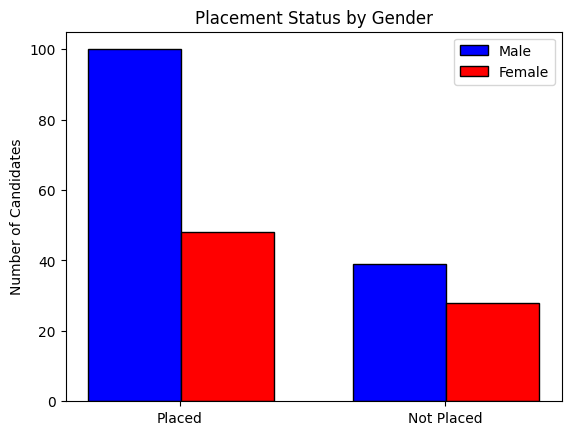

In [133]:
# agrupa os dados por gênero e status de colocação
grouped = df_original.groupby(['gender', 'status']).size()

# separa os dados por gênero e coloca-os em uma lista
male_data = [grouped['M', 'Placed'], grouped['M', 'Not Placed']]
female_data = [grouped['F', 'Placed'], grouped['F', 'Not Placed']]

# cria a figura e os eixos do gráfico de barras
fig, ax = plt.subplots()

# define a largura das barras e a posição dos grupos
bar_width = 0.35
r1 = [0, 1]
r2 = [x + bar_width for x in r1]

# plota as barras para cada grupo
ax.bar(r1, male_data, color='blue', width=bar_width, edgecolor='black', label='Male')
ax.bar(r2, female_data, color='red', width=bar_width, edgecolor='black', label='Female')

# adiciona rótulos e legendas
ax.set_xticks([0.17, 1.17])
ax.set_xticklabels(['Placed', 'Not Placed'])
ax.set_ylabel('Number of Candidates')
ax.set_title('Placement Status by Gender')
ax.legend()

# exibe o gráfico
plt.show()


Verificando a diferença na probabilidade de colocação entre homens e mulheres.

Temos que assim como homens estão entre os mais colocados, também estão no topo quando se trata dos menos colocados.

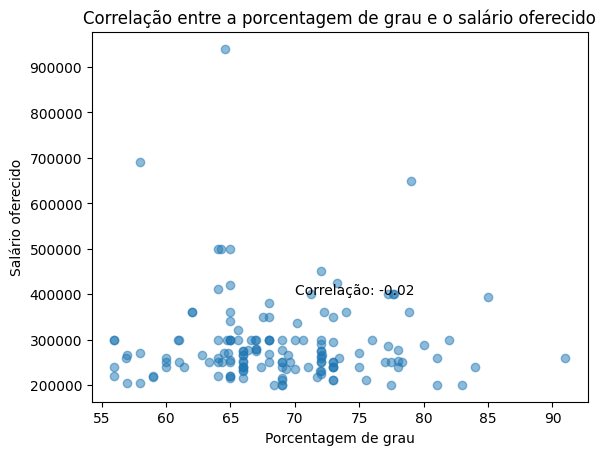

In [131]:
# Selecionando as colunas de interesse
df = df_original[['degree_p', 'salary']]

# Removendo as linhas com valores faltantes
df = df.dropna()

# Calculando a correlação entre as variáveis
corr = np.corrcoef(df['degree_p'], df['salary'])[0, 1]

# Plotando o gráfico de dispersão
plt.scatter(df['degree_p'], df['salary'], alpha=0.5)

# Configurando o título e os rótulos dos eixos
plt.title('Correlação entre a porcentagem de grau e o salário oferecido')
plt.xlabel('Porcentagem de grau')
plt.ylabel('Salário oferecido')

# Imprimindo o valor da correlação no gráfico
plt.text(70, 400000, f'Correlação: {corr:.2f}')

# Exibindo o gráfico
plt.show()

A matriz de correlação entre as duas variáveis e um gráfico de dispersão que mostra a relação entre a porcentagem de grau e o salário oferecido.

Podemos ver que pela correlação ser -0.02, ter uma porcentagem de grau alta não necessariamente garante um salário mais alto.




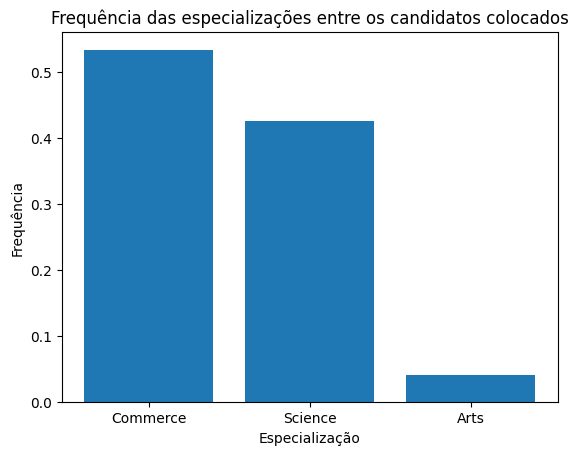

In [127]:
df_especializacao = df_original[['hsc_s', 'status']]

# Cria um DataFrame que contenha apenas os candidatos que foram colocados
df_colocados = df_especializacao[df_especializacao['status'] == 'Placed']

# Calcula a frequência de cada especialização entre os candidatos colocados
df_especializacao_colocados = df_colocados['hsc_s'].value_counts(normalize=True)

# Cria um gráfico de barras para visualizar as frequências das especializações entre os candidatos colocados
plt.bar(df_especializacao_colocados.index, df_especializacao_colocados.values)
plt.title('Frequência das especializações entre os candidatos colocados')
plt.xlabel('Especialização')
plt.ylabel('Frequência')
plt.show()


Verificando a frequência das especializações dos candidatos que foram colocados.

Podemos ver que os que se especializarem em 'Arts' estão menos presentes entre os canditados colocados.

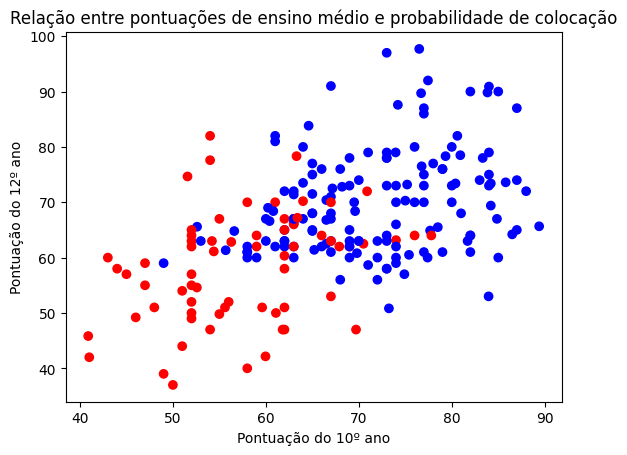

In [128]:
#Plotando gráfico de dispersão
plt.scatter(df_original['ssc_p'], df_original['hsc_p'], c=df_original['status'].map({'Placed': 'blue', 'Not Placed': 'red'}))
plt.xlabel('Pontuação do 10º ano')
plt.ylabel('Pontuação do 12º ano')
plt.title('Relação entre pontuações de ensino médio e probabilidade de colocação')
plt.show()

Os pontos azuis são quem passou e os vermelhos quem não passou, com a tabela informando suas no 12º e no 10º ano, para verificar se existe relação entre a colocação e as notas.

Podemos ver que a pontuação no 12º e 10º anos conseguem sim refletir a maioria dos casos de pessoas não foram colocadas.

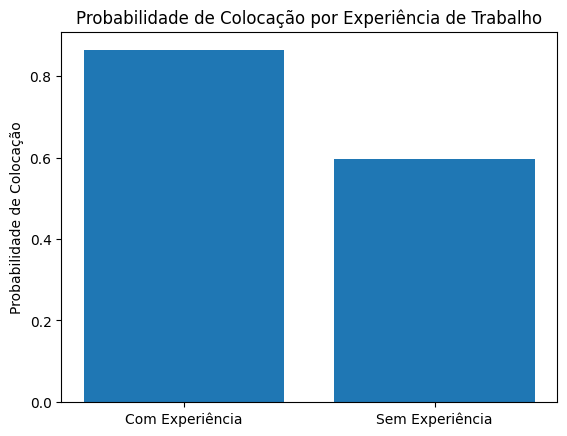

In [129]:
#Calculando a probabilidade de colocação para candidatos com e sem experiência de trabalho
prob_workex = df_original[df_original['workex'] == 'Yes']['status'].value_counts(normalize=True)['Placed']
prob_no_workex = df_original[df_original['workex'] == 'No']['status'].value_counts(normalize=True)['Placed']

#Criando um gráfico de barras para comparar a probabilidade de colocação entre candidatos com e sem experiência de trabalho
fig, ax = plt.subplots()
ax.bar(['Com Experiência', 'Sem Experiência'], [prob_workex, prob_no_workex])
ax.set_title('Probabilidade de Colocação por Experiência de Trabalho')
ax.set_ylabel('Probabilidade de Colocação')
plt.show()

Verificando a quantidade de pessoas que passaram com e sem experiência de trabalho, para saber se ter experiência de trabalho aumenta nas probabilidades de ser colocado.

Podemos ver que pessoas sem experiência obtiveram menos chance de colocação que pessoas com experiência.]

# 7 - Aplicação o LabelEncoder nos atributos categóricos (gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status) de df_no_salary

In [82]:
#Selecionando as colunas categóricas
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

#Criando o LabelEncoder e aplicando em cada coluna categórica
le = LabelEncoder()
for col in categorical_columns:
    df_no_salary[col] = le.fit_transform(df_no_salary[col])

#Exibindo o dataframe com as colunas categóricas transformadas
print(df_no_salary)

     sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0        1       1  67.00      1  91.00      1      1     58.00         2   
1        2       1  79.33      0  78.33      1      2     77.48         2   
2        3       1  65.00      0  68.00      0      0     64.00         0   
3        4       1  56.00      0  52.00      0      2     52.00         2   
4        5       1  85.80      0  73.60      0      1     73.30         0   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
210    211       1  80.60      1  82.00      1      1     77.60         0   
211    212       1  58.00      1  60.00      1      2     72.00         2   
212    213       1  67.00      1  67.00      1      1     73.00         0   
213    214       0  74.00      1  66.00      1      1     58.00         0   
214    215       1  62.00      0  58.00      1      2     53.00         0   

     workex  etest_p  specialisation  mba_p  status  
0         0     55.0 

# 8 - Selecionando o modelo de Regressão Logística) e o treinando com df_no_salary. O objetivo é prever a recolocação (status = [Placed/Recolocado, Not Placed/Não Recolocado]) de cada indivíduo.

# e 

# 9 - Comentarei as avaliações (Recall, Precision, ROC e AUC) obtidas pelo modelo de classificação utilizado. Informando se os resultados são bons ou ruins de acordo com as métricas.

In [83]:
# O processo de Regressão Logística


X = df_no_salary.drop(['status'], axis=1)
y = df_no_salary['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
# Codificando as classes em 0 e 1

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Agora podemos aplicar a Regressão Logística, fazer as previsões e calcular as métricas novamente:

In [85]:
logreg = LogisticRegression(max_iter=10000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [86]:
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia da Regressão Logística: {accuracy:.2f}")

Acurácia da Regressão Logística: 0.88


In [87]:
# Calculando as métricas
recall = recall_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"AUC: {auc:.2f}")

Recall: 0.94
Precision: 0.91
AUC: 0.84


O modelo de classificação utilizado apresentou uma acurácia de 0.88, o que indica que ele acertou 88% das classificações realizadas.

O recall do modelo foi de 0.94, o que significa que ele conseguiu detectar corretamente 94% dos casos positivos, ou seja, das pessoas que foram efetivamente recolocadas ou colocadas em uma empresa.

A precision do modelo foi de 0.91, o que significa que dentre as classificações positivas feitas pelo modelo, 91% delas eram realmente verdadeiras.

A AUC (área sob a curva) da curva ROC foi de 0.84, que mede a capacidade do modelo de distinguir entre as classes positiva e negativa. Quanto mais próxima de 1 for a AUC, melhor é a capacidade do modelo de fazer essa distinção.

Em geral, os resultados obtidos pelo modelo foram bons. Uma acurácia de 0.88 é considerada alta em muitos casos, e o recall e a precision do modelo foram muito bons, indicando que ele conseguiu detectar corretamente a maioria dos casos positivos e minimizar o número de falsos positivos. A AUC também foi razoável, indicando que o modelo tem uma capacidade boa de distinguir entre as classes positiva e negativa.




# 10 - A partir de df_original, criarei o Data Frame df_no_status agora removendo a coluna status,  aplicando o LabelEncoder, separarei as amostras que não possuem o atributo salary (dados ausentes)


In [88]:


# Remover a coluna "status"
df_no_status = df_original.drop('status', axis=1)
#Para aplicar o LabelEncoder aos dados, podemos usar a classe LabelEncoder do Scikit-Learn da seguinte forma:


# Aplicar LabelEncoder às colunas categóricas
le = LabelEncoder()
df_no_status['gender'] = le.fit_transform(df_no_status['gender'])
df_no_status['degree_t'] = le.fit_transform(df_no_status['degree_t'])
df_no_status['specialisation'] = le.fit_transform(df_no_status['specialisation'])
df_no_status['ssc_b'] = le.fit_transform(df_no_status['ssc_b'])
df_no_status['hsc_b'] = le.fit_transform(df_no_status['hsc_b'])
df_no_status['hsc_s'] = le.fit_transform(df_no_status['hsc_s'])
df_no_status['degree_t'] = le.fit_transform(df_no_status['degree_t'])
df_no_status['workex'] = le.fit_transform(df_no_status['workex'])
df_no_status['specialisation'] = le.fit_transform(df_no_status['specialisation'])

#Por fim, para separar as amostras que não possuem o atributo "salary", podemos utilizar a função dropna do Pandas da seguinte forma:


#\/ remover ou mudar pra só pegar o dado ausente de salário

# Separar amostras sem o atributo "salary"
df_missing_salary = df_no_status.dropna(subset=['salary'])
#Dessa forma, o DataFrame df_missing_salary conterá apenas as amostras que possuem o atributo "salary".

In [89]:
print(df_no_status)

     sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0        1       1  67.00      1  91.00      1      1     58.00         2   
1        2       1  79.33      0  78.33      1      2     77.48         2   
2        3       1  65.00      0  68.00      0      0     64.00         0   
3        4       1  56.00      0  52.00      0      2     52.00         2   
4        5       1  85.80      0  73.60      0      1     73.30         0   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
210    211       1  80.60      1  82.00      1      1     77.60         0   
211    212       1  58.00      1  60.00      1      2     72.00         2   
212    213       1  67.00      1  67.00      1      1     73.00         0   
213    214       0  74.00      1  66.00      1      1     58.00         0   
214    215       1  62.00      0  58.00      1      2     53.00         0   

     workex  etest_p  specialisation  mba_p    salary  
0         0     55.

In [90]:
print(df_missing_salary)

     sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0        1       1  67.00      1  91.00      1      1     58.00         2   
1        2       1  79.33      0  78.33      1      2     77.48         2   
2        3       1  65.00      0  68.00      0      0     64.00         0   
4        5       1  85.80      0  73.60      0      1     73.30         0   
7        8       1  82.00      0  64.00      0      2     66.00         2   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
209    210       1  62.00      0  72.00      0      1     65.00         0   
210    211       1  80.60      1  82.00      1      1     77.60         0   
211    212       1  58.00      1  60.00      1      2     72.00         2   
212    213       1  67.00      1  67.00      1      1     73.00         0   
213    214       0  74.00      1  66.00      1      1     58.00         0   

     workex  etest_p  specialisation  mba_p    salary  
0         0     55.

# 11 - Treinando um modelo de regressão linear múltipla e prevendo os salários (salary) das amostras que não possuem essa informação em df_no_status



In [91]:
df_missing_salary = df_no_status[df_no_status['salary'].isna()]


print(df_missing_salary)


# Ele quer pegar todas as amostras que NÃO tenham salário
# e preve-las

     sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
3        4       1   56.0      0   52.0      0      2     52.00         2   
5        6       1   55.0      1   49.8      1      2     67.25         2   
6        7       0   46.0      1   49.2      1      1     79.00         0   
9       10       1   58.0      0   70.0      0      1     61.00         0   
12      13       0   47.0      0   55.0      1      2     65.00         0   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
198    199       0   67.0      0   70.0      0      1     65.00         1   
201    202       1   54.2      0   63.0      1      2     58.00         0   
206    207       1   41.0      0   42.0      0      2     60.00         0   
208    209       0   43.0      0   60.0      1      2     65.00         0   
214    215       1   62.0      0   58.0      1      2     53.00         0   

     workex  etest_p  specialisation  mba_p  salary  
3         0    66.00 

In [93]:
# separar as amostras que não possuem o atributo 'salary'
df_missing_salary = df_no_status[df_no_status['salary'].isnull()]

# separar as amostras que possuem o atributo 'salary'
df_with_salary = df_no_status.dropna(subset=['salary'])

# definir as colunas categóricas e numéricas
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
numeric_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# aplicar o pre-processamento às colunas categóricas e numéricas
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_cols),
    ('num', SimpleImputer(strategy='mean'), numeric_cols)
])

# treinar o modelo de regressão linear múltipla
X_train = preprocessor.fit_transform(df_with_salary.drop('salary', axis=1))
y_train = df_with_salary['salary']
model = LinearRegression().fit(X_train, y_train)

# prever os salários das amostras que não possuem essa informação
X_test = preprocessor.transform(df_missing_salary.drop('salary', axis=1))
predicted_salaries = model.predict(X_test)

# adicionar as novas previsões ao DataFrame original
df_missing_salary.loc[:, 'salary'] = predicted_salaries

# combinar novamente as amostras com e sem o atributo 'salary'
df_predicted = pd.concat([df_with_salary, df_missing_salary])

# visualizar as previsões
print(df_predicted)

     sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0        1       1  67.00      1  91.00      1      1     58.00         2   
1        2       1  79.33      0  78.33      1      2     77.48         2   
2        3       1  65.00      0  68.00      0      0     64.00         0   
4        5       1  85.80      0  73.60      0      1     73.30         0   
7        8       1  82.00      0  64.00      0      2     66.00         2   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
198    199       0  67.00      0  70.00      0      1     65.00         1   
201    202       1  54.20      0  63.00      1      2     58.00         0   
206    207       1  41.00      0  42.00      0      2     60.00         0   
208    209       0  43.00      0  60.00      1      2     65.00         0   
214    215       1  62.00      0  58.00      1      2     53.00         0   

     workex  etest_p  specialisation  mba_p         salary  
0         0   

C:\Users\User\AppData\Local\Temp\ipykernel_4980\1710889052.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_salary.loc[:, 'salary'] = predicted_salaries


In [94]:
print(df_predicted)

     sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0        1       1  67.00      1  91.00      1      1     58.00         2   
1        2       1  79.33      0  78.33      1      2     77.48         2   
2        3       1  65.00      0  68.00      0      0     64.00         0   
4        5       1  85.80      0  73.60      0      1     73.30         0   
7        8       1  82.00      0  64.00      0      2     66.00         2   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
198    199       0  67.00      0  70.00      0      1     65.00         1   
201    202       1  54.20      0  63.00      1      2     58.00         0   
206    207       1  41.00      0  42.00      0      2     60.00         0   
208    209       0  43.00      0  60.00      1      2     65.00         0   
214    215       1  62.00      0  58.00      1      2     53.00         0   

     workex  etest_p  specialisation  mba_p         salary  
0         0   

In [95]:
df_with_salary['salary']

0      270000.0
1      200000.0
2      250000.0
4      425000.0
7      252000.0
         ...   
209    216000.0
210    400000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 148, dtype: float64

# 12 - Para as amostras que não possuem o atributo salary preenchidos em df_no_status, incluirei o valor previsto pelo modelo de regressão linear múltipla

In [96]:
df_no_status = df_predicted


In [97]:
df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,250000.000000
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,425000.000000
7,8,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,252000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,0,67.00,0,70.00,0,1,65.00,1,0,88.00,1,71.96,346493.023313
201,202,1,54.20,0,63.00,1,2,58.00,0,0,79.00,1,58.44,282370.270740
206,207,1,41.00,0,42.00,0,2,60.00,0,0,97.00,0,53.39,306524.367886
208,209,0,43.00,0,60.00,1,2,65.00,0,0,92.66,1,62.92,279984.711319


# 13 - Agora que preenchi os dados ausentes do atributo salary de df_no_status, copiarei o atributos salary de df_no_status para df_original

In [98]:
df_original


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [99]:
df_original.update(df_no_status['salary'])


In [100]:
df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,335478.568302
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


# 14 - Treinando o modelo de classificação selecionado em 8 agora com df_original, com o mesmo objetivo de prever a recolocação



In [101]:
# Aplicar LabelEncoder às colunas categóricas
le = LabelEncoder()
df_original['gender'] = le.fit_transform(df_original['gender'])
df_original['degree_t'] = le.fit_transform(df_original['degree_t'])
df_original['specialisation'] = le.fit_transform(df_original['specialisation'])
df_original['ssc_b'] = le.fit_transform(df_original['ssc_b'])
df_original['hsc_b'] = le.fit_transform(df_original['hsc_b'])
df_original['hsc_s'] = le.fit_transform(df_original['hsc_s'])
df_original['degree_t'] = le.fit_transform(df_original['degree_t'])
df_original['workex'] = le.fit_transform(df_original['workex'])
df_original['specialisation'] = le.fit_transform(df_original['specialisation'])


#Transformando Placed em 1 e not placed em 0
df_original['status'] = le.fit_transform(df_original['status'])

# separar os atributos independentes (X) e a variável dependente (y)
X = df_original.drop(['status'], axis=1)
y = df_original['status']

# dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instanciar e treinar um modelo de regressão logística
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
# fazer previsões para o conjunto de teste
y_pred = logreg_model.predict(X_test)

# avaliar o desempenho do modelo usando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia do modelo:', accuracy)

Acurácia do modelo: 0.8604651162790697


In [102]:
df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,335478.568302
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.000000
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.000000
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.000000
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.000000


In [103]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia da Regressão Logística: {accuracy:.2f}")

Acurácia da Regressão Logística: 0.86


In [104]:
# Calculando as métricas
recall = recall_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"AUC: {auc:.2f}")

Recall: 0.94
Precision: 0.88
AUC: 0.80


# Comparação e comentário sobre os resultados obtidos em 9 com os resultados obtidos em 14


Comparando os resultados obtidos em 9 e 14, podemos observar que a acurácia do modelo de classificação treinado com o conjunto de dados com valores ausentes preenchidos (df_original) foi um pouco menor (0,86 vs. 0,88). No entanto, a diferença não é muito grande e a acurácia de ambos os modelos é considerada boa.


Em relação às outras métricas, o modelo treinado com df_original apresentou um valor ligeiramente inferior de Precision (0,88 vs. 0,91), o que significa que houve um pouco mais de falsos positivos (previsões de que um indivíduo seria recolocado, mas na verdade não foi). Por outro lado, o valor de AUC também foi ligeiramente inferior (0,80 vs. 0,84), o que indica que o modelo treinado com df_original não teve um desempenho tão bom na separação das classes quanto o modelo treinado com df_no_salary.


Concluindo, as diferenças em todas as métricas são relativamente pequenas e ambos os modelos apresentam um desempenho considerado bom.